In [2]:
from models import Autoencoder, fit_activation_parameters, parametric_activation
from utils.training import load_checkpoint
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn.functional as F

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = Autoencoder(input_channels=3, device=device).to(device)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters())

# checkpoint_filename = 'outputs/checkpoints/autoencoder_checkpoint.pth'
# start_epoch, saved_loss = load_checkpoint(
#     model, optimizer, checkpoint_filename)

# activation = model.adaptive_activation

In [1]:
# Save the activation function
torch.save(activation, 'activation.pth')

NameError: name 'torch' is not defined

In [17]:
activation = torch.load('activation.pth')

C:\Users\The_Boss\AppData\Local\Temp\ipykernel_36028\2992479456.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  activation = torch.load('activation.pth')


In [4]:
print(activation)

AdaptiveActivation()


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models.adaptive_activation import AdaptiveActivation

device = torch.device("cpu")

def test_adaptive_activation():
    # Create an instance of AdaptiveActivation
    adaptive_activation = AdaptiveActivation().to(device)

    # Generate input data
    x = torch.linspace(-100, 100, 1000, device=device)

    # Get outputs from the adaptive activation function
    adaptive_output = adaptive_activation(x)

    # Compare with other activation functions
    relu_output = F.relu(x)
    leaky_relu_output = F.leaky_relu(x, negative_slope=0.01)
    elu_output = F.elu(x, alpha=1.0)
    hardswish_output = F.hardswish(x)
    hardshrink_output = F.hardshrink(x)
    rrelu_output = F.rrelu(x, lower=0.1, upper=0.3)
    silu_output = F.silu(x)
    gelu_output = F.gelu(x)
    mish_output = F.mish(x)
    selu_output = F.selu(x)
    softshrink_output = F.softshrink(x)
    tanhshrink_output = F.tanhshrink(x)
    softplus_output = F.softplus(x)
    prelu = nn.PReLU()(x)

    # Check if outputs are different
    assert not torch.allclose(adaptive_output, relu_output, atol=1e-5), "AdaptiveActivation does not match ReLU"
    assert not torch.allclose(adaptive_output, leaky_relu_output, atol=1e-5), "AdaptiveActivation does not match Leaky ReLU"
    assert not torch.allclose(adaptive_output, elu_output, atol=1e-5), "AdaptiveActivation does not match ELU"
    assert not torch.allclose(adaptive_output, hardswish_output, atol=1e-5), "AdaptiveActivation does not match Hardswish"
    assert not torch.allclose(adaptive_output, hardshrink_output, atol=1e-5), "AdaptiveActivation does not match Hardshrink"
    assert not torch.allclose(adaptive_output, rrelu_output, atol=1e-5), "AdaptiveActivation does not match RReLU"
    assert not torch.allclose(adaptive_output, silu_output, atol=1e-5), "AdaptiveActivation does not match SiLU"
    assert not torch.allclose(adaptive_output, gelu_output, atol=1e-5), "AdaptiveActivation does not match GELU"
    assert not torch.allclose(adaptive_output, mish_output, atol=1e-5), "AdaptiveActivation does not match Mish"
    assert not torch.allclose(adaptive_output, selu_output, atol=1e-5), "AdaptiveActivation does not match SELU"
    assert not torch.allclose(adaptive_output, softshrink_output, atol=1e-5), "AdaptiveActivation does not match Softshrink"
    assert not torch.allclose(adaptive_output, tanhshrink_output, atol=1e-5), "AdaptiveActivation does not match Tanhshrink"
    assert not torch.allclose(adaptive_output, softplus_output, atol=1e-5), "AdaptiveActivation does not match Softplus"
    assert not torch.allclose(adaptive_output, prelu, atol=1e-5), "AdaptiveActivation does not match PReLU"

    print("All tests passed!")

# Run the test
test_adaptive_activation()


All tests passed!


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a simple autoencoder architecture
class SimpleAutoencoder(nn.Module):
    def __init__(self, activation):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            activation,
            nn.Linear(256, 128),
            activation,
            nn.Linear(128, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            activation,
            nn.Linear(128, 256),
            activation,
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load and preprocess MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Define activation functions to test
activation_functions = {
    'ReLU': nn.ReLU(),
    'LeakyReLU': nn.LeakyReLU(),
    'Hardswish': nn.Hardswish(),
    'Hardshrink': nn.Hardshrink(),
    'RReLU': nn.RReLU(),
    'ELU': nn.ELU(),
    'SiLU': nn.SiLU(),
    'GELU': nn.GELU(),
    'Mish': nn.Mish(),
    'SELU': nn.SELU(),
    'Softshrink': nn.Softshrink(),
    'Tanhshrink': nn.Tanhshrink(),
    'Softplus': nn.Softplus(),
    'PReLU': nn.PReLU(),
    'AdaptiveActivation': activation
}

# Training function
def train_autoencoder(model, train_loader, epochs=5):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        for data in train_loader:
            img, _ = data
            img = img.view(img.size(0), -1).to(device)
            
            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, img)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}')
    
    return losses

results = {}


Training autoencoder with ReLU
Epoch [1/5], Loss: 0.051885
Epoch [2/5], Loss: 0.024696
Epoch [3/5], Loss: 0.018832
Epoch [4/5], Loss: 0.015770
Epoch [5/5], Loss: 0.013741

Training autoencoder with LeakyReLU
Epoch [1/5], Loss: 0.048394
Epoch [2/5], Loss: 0.021217
Epoch [3/5], Loss: 0.015563
Epoch [4/5], Loss: 0.012893
Epoch [5/5], Loss: 0.011080

Training autoencoder with Hardswish
Epoch [1/5], Loss: 0.050874
Epoch [2/5], Loss: 0.024817
Epoch [3/5], Loss: 0.018575
Epoch [4/5], Loss: 0.015077
Epoch [5/5], Loss: 0.012685

Training autoencoder with Hardshrink
Epoch [1/5], Loss: 0.194275
Epoch [2/5], Loss: 0.141604
Epoch [3/5], Loss: 0.112036
Epoch [4/5], Loss: 0.095421
Epoch [5/5], Loss: 0.085732

Training autoencoder with RReLU
Epoch [1/5], Loss: 0.050675
Epoch [2/5], Loss: 0.021695
Epoch [3/5], Loss: 0.014833
Epoch [4/5], Loss: 0.011746
Epoch [5/5], Loss: 0.010176

Training autoencoder with ELU
Epoch [1/5], Loss: 0.047393
Epoch [2/5], Loss: 0.023549
Epoch [3/5], Loss: 0.017616
Epoch [4

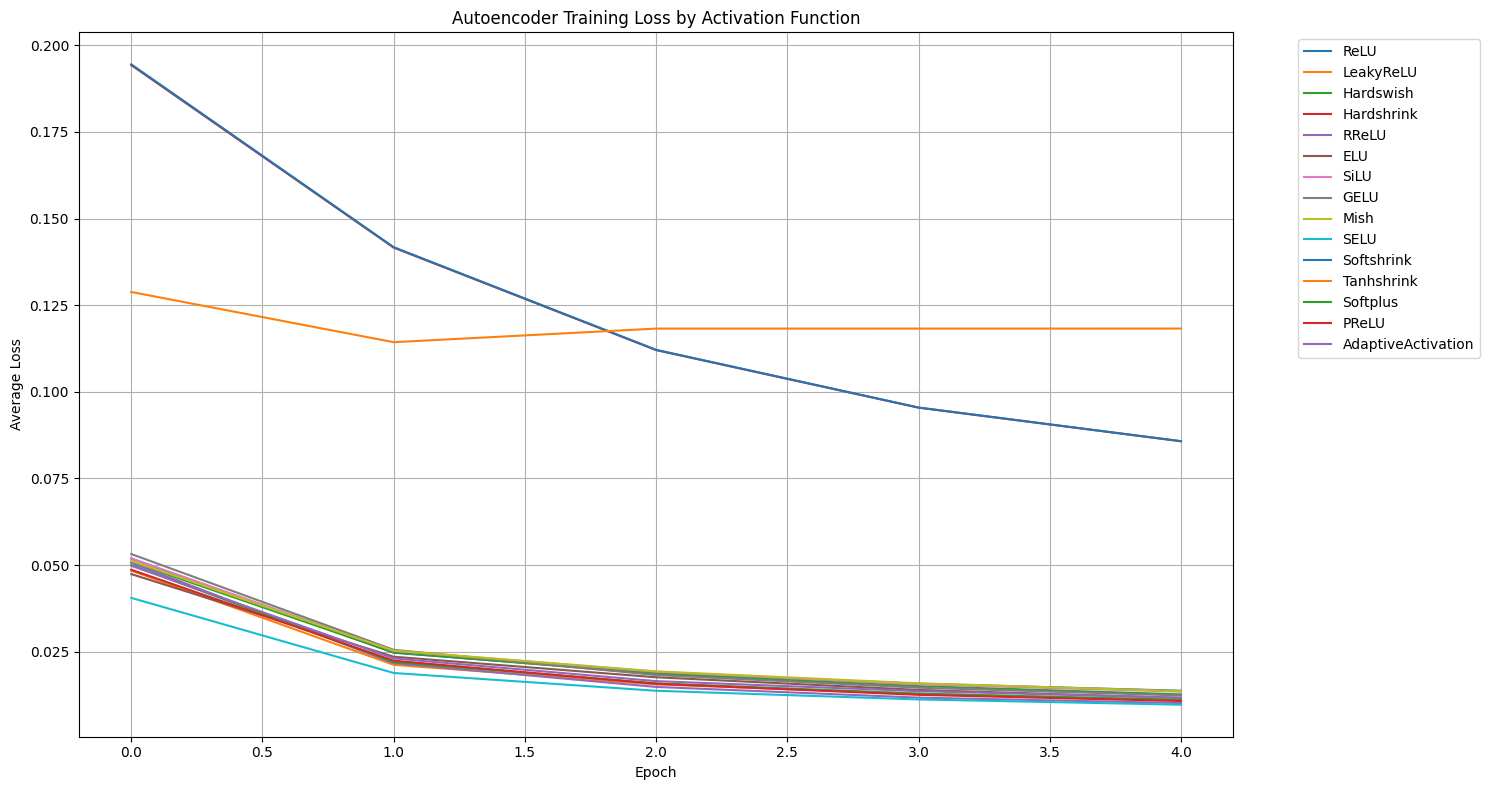

In [19]:
# Test each activation function
for name, activation in activation_functions.items():
    print(f"\nTraining autoencoder with {name}")
    model = SimpleAutoencoder(activation).to(device)
    losses = train_autoencoder(model, train_loader)
    results[name] = losses

# Plot results
plt.figure(figsize=(15, 8))
for name, losses in results.items():
    plt.plot(losses, label=name)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Autoencoder Training Loss by Activation Function')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results for later analysis
torch.save(results, 'activation_comparison_results.pth')